# import and load data

In [1]:
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon, binom

In [3]:
data_q = np.loadtxt("data/data1q.dat.gz")
data_x = np.loadtxt("data/data1x.dat.gz")
data_y = np.loadtxt("data/data1y.dat.gz")
data_t = np.loadtxt("data/data1t.dat.gz")

# Trabalho

## (a) Cálculo da Expectância e Variância Teóricas

In [4]:
# Cálculo das expectativas e variâncias teóricas
# Normal Q ~ N(0, 2)
E_Q = 0
Var_Q = 2

# Uniforme X ~ U[-1, 1]
E_X = 0
Var_X = 1 / 3

# Exponencial Y ~ E(lambda = 0.05)
lambda_Y = 0.05
E_Y = 1 / lambda_Y
Var_Y = 1 / (lambda_Y**2)

# Binomial T ~ B(15, 0.40)
n_T = 15
p_T = 0.40
E_T = n_T * p_T
Var_T = n_T * p_T * (1 - p_T)

# Resultados
print("Cálculos Teóricos:")
print("Para a variável Q ~ N(0, 2):")
print(f"  Expectância (E[Q]) = {E_Q}")
print(f"  Variância (Var[Q]) = {Var_Q}")
print()

print("Para a variável X ~ U[-1, 1]:")
print(f"  Expectância (E[X]) = {E_X}")
print(f"  Variância (Var[X]) = {Var_X}")
print()

print("Para a variável Y ~ E(lambda = 0.05):")
print(f"  Expectância (E[Y]) = {E_Y}")
print(f"  Variância (Var[Y]) = {Var_Y}")
print()

print("Para a variável T ~ B(15, 0.40):")
print(f"  Expectância (E[T]) = {E_T}")
print(f"  Variância (Var[T]) = {Var_T}")

Cálculos Teóricos:
Para a variável Q ~ N(0, 2):
  Expectância (E[Q]) = 0
  Variância (Var[Q]) = 2

Para a variável X ~ U[-1, 1]:
  Expectância (E[X]) = 0
  Variância (Var[X]) = 0.3333333333333333

Para a variável Y ~ E(lambda = 0.05):
  Expectância (E[Y]) = 20.0
  Variância (Var[Y]) = 399.99999999999994

Para a variável T ~ B(15, 0.40):
  Expectância (E[T]) = 6.0
  Variância (Var[T]) = 3.5999999999999996


## (b) Estimativas para Média e Variância

In [5]:
# Estimativas de média e variância
def estimativas(data):
    media = np.mean(data)
    variancia = np.var(data)
    return media, variancia

# Calculando as estimativas para cada variável
media_q, variancia_q = estimativas(data_q)
media_x, variancia_x = estimativas(data_x)
media_y, variancia_y = estimativas(data_y)
media_t, variancia_t = estimativas(data_t)

# Imprimindo os resultados
print("Estimativas Empíricas:")
print("Para a variável Q ~ N(0, 2):")
print(f"  Média estimada (E[Q]) = {media_q}")
print(f"  Variância estimada (Var[Q]) = {variancia_q}")
print()

print("Para a variável X ~ U[-1, 1]:")
print(f"  Média estimada (E[X]) = {media_x}")
print(f"  Variância estimada (Var[X]) = {variancia_x}")
print()

print("Para a variável Y ~ E(lambda = 0.05):")
print(f"  Média estimada (E[Y]) = {media_y}")
print(f"  Variância estimada (Var[Y]) = {variancia_y}")
print()

print("Para a variável T ~ B(15, 0.40):")
print(f"  Média estimada (E[T]) = {media_t}")
print(f"  Variância estimada (Var[T]) = {variancia_t}")

Estimativas Empíricas:
Para a variável Q ~ N(0, 2):
  Média estimada (E[Q]) = -8.758442457115927e-05
  Variância estimada (Var[Q]) = 1.9996143451196213

Para a variável X ~ U[-1, 1]:
  Média estimada (E[X]) = -0.0002313974443142124
  Variância estimada (Var[X]) = 0.33325456223410865

Para a variável Y ~ E(lambda = 0.05):
  Média estimada (E[Y]) = 20.007564663512877
  Variância estimada (Var[Y]) = 400.3695578419323

Para a variável T ~ B(15, 0.40):
  Média estimada (E[T]) = 5.999794
  Variância estimada (Var[T]) = 3.602208357564


## (c) Construção de Histogramas

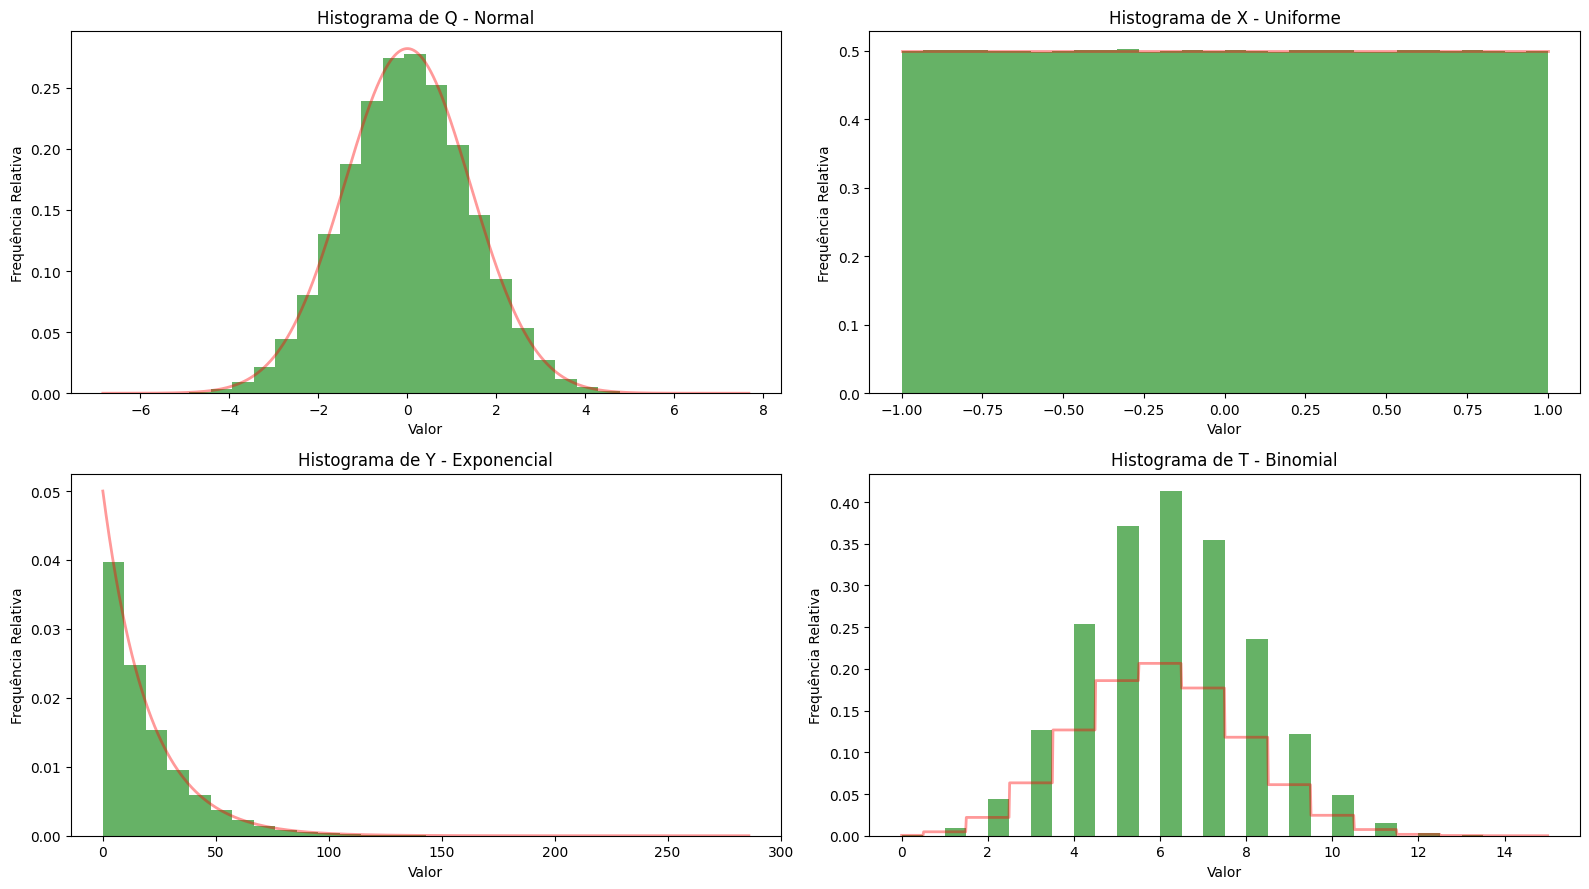

In [9]:
def plot_histogramas_com_curva_teorica(data_list, nomes, params):
    fig, axs = plt.subplots(2, 2, figsize=(16, 9))
    axs = axs.ravel()
    
    for i, data in enumerate(data_list):
        axs[i].hist(data, bins=30, density=True, alpha=0.6, color='g')
        axs[i].set_title(f'Histograma de {nomes[i]}')
        axs[i].set_xlabel('Valor')
        axs[i].set_ylabel('Frequência Relativa')
        
        # Plotting the theoretical curve
        x = np.linspace(min(data), max(data), 1000)
        if nomes[i] == "Q - Normal":
            pdf = norm.pdf(x, params[i][0], np.sqrt(params[i][1]))
        elif nomes[i] == "X - Uniforme":
            pdf = uniform.pdf(x, -1, 2)
        elif nomes[i] == "Y - Exponencial":
            pdf = expon.pdf(x, scale=params[i][0])
        elif nomes[i] == "T - Binomial":
            pdf = binom.pmf(np.round(x), params[i][0], params[i][1])
        
        axs[i].plot(x, pdf, 'r-', lw=2, alpha=0.4)
    
    plt.tight_layout()
    plt.show()

# Parâmetros teóricos
params = [(E_Q, Var_Q), (E_X, Var_X), (E_Y, Var_Y), (n_T, p_T)]

data_list = [data_q, data_x, data_y, data_t]
nomes = ["Q - Normal", "X - Uniforme", "Y - Exponencial", "T - Binomial"]

# Plotando os histogramas com curvas teóricas
plot_histogramas_com_curva_teorica(data_list, nomes, params)

## (d) Cálculo de Média e Variância Amostral

In [6]:
def media_amostral(data, n):
    amostra = np.random.choice(data, size=n)
    return np.mean(amostra)

def variancia_amostral(data, n):
    amostra = np.random.choice(data, size=n)
    return np.var(amostra, ddof=1)

# Parâmetros de amostra
n_values = [5, 10, 50]
num_amostras = 10000

# Cálculo para cada variável e tamanho de amostra
for n in n_values:
    medias_q, variancias_q = [], []
    medias_x, variancias_x = [], []
    medias_y, variancias_y = [], []
    medias_t, variancias_t = [], []
    for _ in range(num_amostras):
        medias_q.append(media_amostral(data_q, n))
        variancias_q.append(variancia_amostral(data_q, n))
        medias_x.append(media_amostral(data_x, n))
        variancias_x.append(variancia_amostral(data_x, n))
        medias_y.append(media_amostral(data_y, n))
        variancias_y.append(variancia_amostral(data_y, n))
        medias_t.append(media_amostral(data_t, n))
        variancias_t.append(variancia_amostral(data_t, n))

    print("===============================================")

    # Imprimindo a média geral e variância geral para verificar o comportamento
    print(f"Média e variância geral (para n={n}) para cada variável:")
    print(f"Média geral de Q: {np.mean(media_q)}")
    print(f"Variância geral de Q: {np.var(variancia_q)}")
    print()

    print(f"Média geral de X: {np.mean(media_x)}")
    print(f"Variância geral de X: {np.var(variancia_x)}")
    print()

    print(f"Média geral de Y: {np.mean(media_y)}")
    print(f"Variância geral de Y: {np.var(variancia_y)}")
    print()

    print(f"Média geral de T: {np.mean(media_t)}")
    print(f"Variância geral de T: {np.var(variancia_t)}")
    print()

Média e variância geral (para n=5) para cada variável:
Média geral de Q: -8.758442457115927e-05
Variância geral de Q: 0.0

Média geral de X: -0.0002313974443142124
Variância geral de X: 0.0

Média geral de Y: 20.007564663512877
Variância geral de Y: 0.0

Média geral de T: 5.999794
Variância geral de T: 0.0

Média e variância geral (para n=10) para cada variável:
Média geral de Q: -8.758442457115927e-05
Variância geral de Q: 0.0

Média geral de X: -0.0002313974443142124
Variância geral de X: 0.0

Média geral de Y: 20.007564663512877
Variância geral de Y: 0.0

Média geral de T: 5.999794
Variância geral de T: 0.0

Média e variância geral (para n=50) para cada variável:
Média geral de Q: -8.758442457115927e-05
Variância geral de Q: 0.0

Média geral de X: -0.0002313974443142124
Variância geral de X: 0.0

Média geral de Y: 20.007564663512877
Variância geral de Y: 0.0

Média geral de T: 5.999794
Variância geral de T: 0.0



## (e) Histogramas para Médias e Variâncias Amostrais

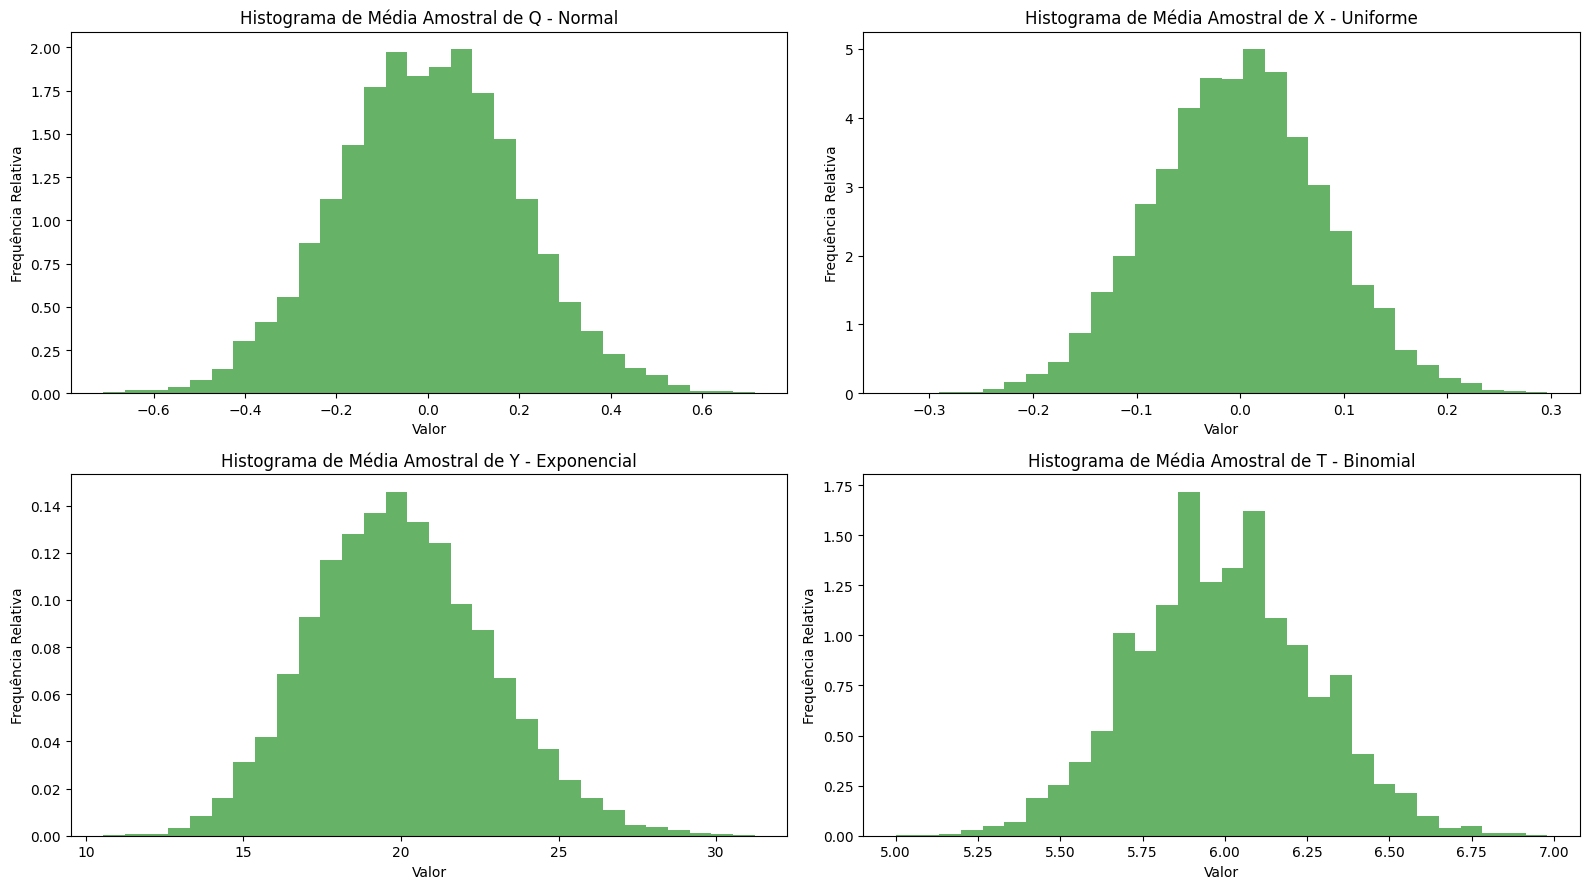

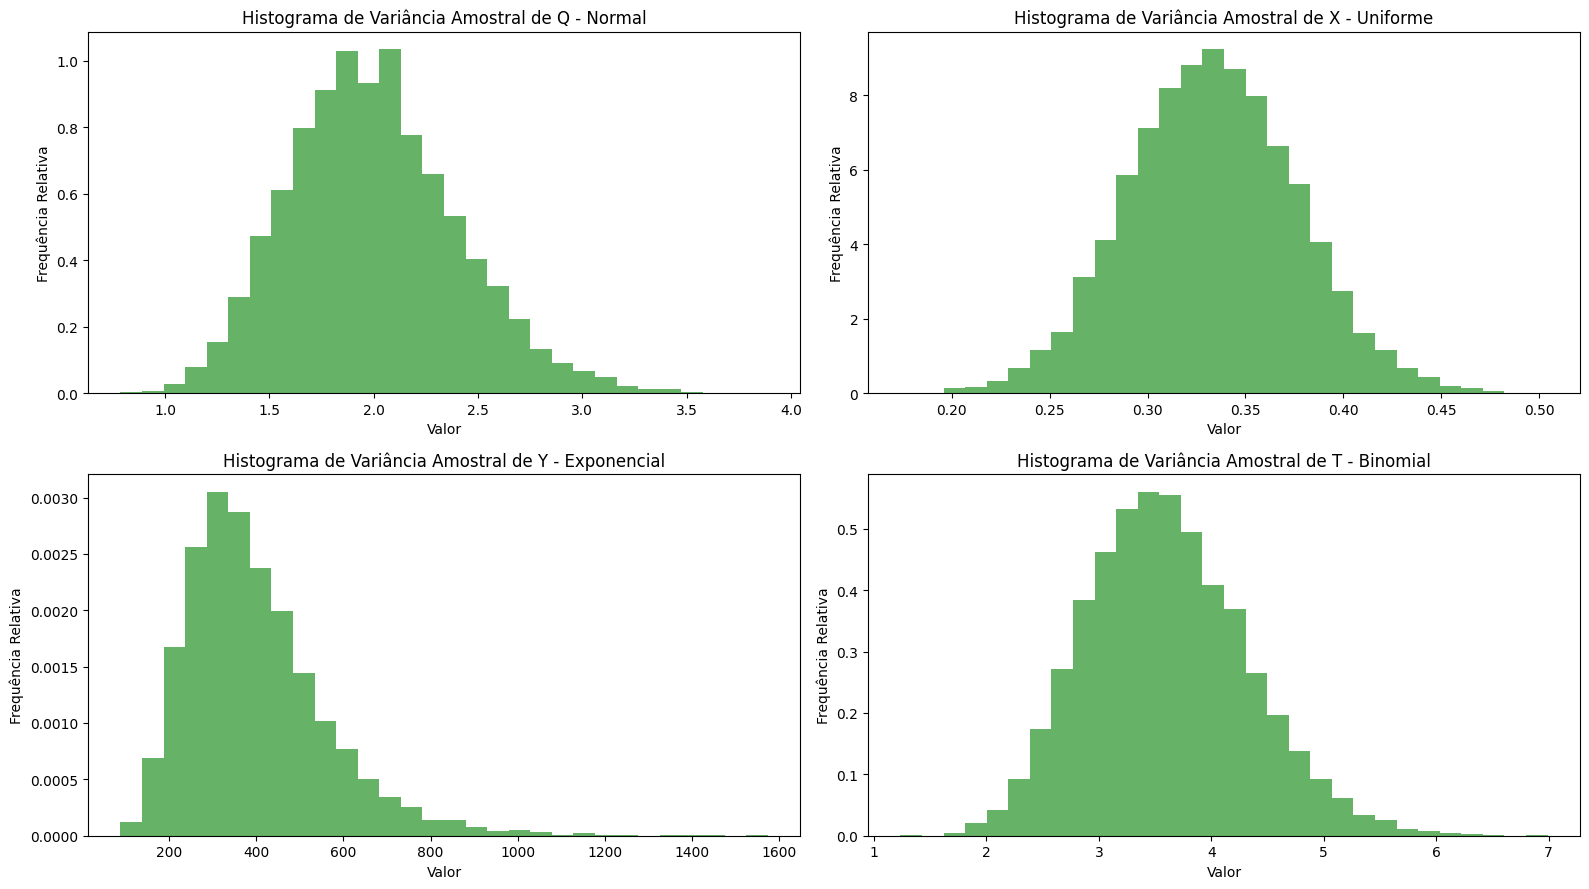

In [18]:
def plot_histogramas_amostrais(data_list, nomes, tipo):
    fig, axs = plt.subplots(2, 2, figsize=(16, 9))
    axs = axs.ravel()
    
    for i, data in enumerate(data_list):
        axs[i].hist(data, bins=30, density=True, alpha=0.6, color='g')
        axs[i].set_title(f'Histograma de {tipo} de {nomes[i]}')
        axs[i].set_xlabel('Valor')
        axs[i].set_ylabel('Frequência Relativa')
    
    plt.tight_layout()
    plt.show()

# Plotando os histogramas das médias amostrais e variâncias amostrais
plot_histogramas_amostrais([media_q, media_x, media_y, media_t], nomes, "Média Amostral")
plot_histogramas_amostrais([variancia_q, variancia_x, variancia_y, variancia_t], nomes, "Variância Amostral")

## (f) Comparação dos Resultados